### 탐색적 데이터 분석(EDA : Exploratory Data Analysis)
- 표           : 빈도표, 교차표
- 데이터 시각화 : 막대그래프, 히스토그램, 상자그림, 바이올린, ...
- 기술통계량    : 평균, 중위수, 표준편차, 중위수절대편차, ...

In [49]:
# 참고 : 미니콘다 
# https://www.whatwant.com/entry/miniconda
# https://wikidocs.net/167542

In [68]:
# 패키지 로딩하기
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import statsmodels.api   as sm

from matplotlib           import font_manager, rc 
from sklearn.linear_model import LinearRegression
from sklearn.metrics      import mean_squared_error, r2_score

In [13]:
# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [2]:
# 엑셀 파일 경로 설정
file_path = 'd:/SEN/SEN2023.xlsx'

# 엑셀 파일 읽어오기
sen = pd.read_excel(file_path)
sen

시도교육청      지역교육청   지역    정보공시학교코드              학교명  학교급코드 설립구분 제외여부  \
0    서울특별시교육청        교육부  서초구  S000003511    서울교육대학교부설초등학교      2   국립    N   
1    서울특별시교육청        교육부  종로구  S000003563  서울대학교사범대학부설초등학교      2   국립    N   
2    서울특별시교육청  강남서초교육지원청  강남구  S010000738         서울개일초등학교      2   공립    N   
3    서울특별시교육청  강남서초교육지원청  강남구  S010000739         서울개포초등학교      2   공립    N   
4    서울특별시교육청  강남서초교육지원청  강남구  S010000741         서울구룡초등학교      2   공립    N   
..        ...        ...  ...         ...              ...    ...  ...  ...   
599  서울특별시교육청    남부교육지원청  구로구  S010006431        서울하늘숲초등학교      2   공립    N   
600  서울특별시교육청    남부교육지원청  구로구  S010006432         서울항동초등학교      2   공립    N   
601  서울특별시교육청  강동송파교육지원청  송파구  S010006433        서울해누리초등학교      2   공립    N   
602  서울특별시교육청    동부교육지원청  중랑구  S010006476        서울양원숲초등학교      2   공립    N   
603  서울특별시교육청  강동송파교육지원청  강동구  S010006543         서울강빛초등학교      2   공립    N   

     제외사유  교과프로그램수  ...  초등돌봄교실저녁돌봄참여학생수  초등돌봄교실방과후학교연계형돌봄운영교실수  \
0     NaN        3  ...                9                      0   
1     NaN       20  ...                0                      0   
2     NaN       10  ...                1                      0   
3     NaN        0  ...                0                      0   
4     NaN       14  ...                0                      1   
..    ...      ...  ...              ...                    ...   
599   NaN       26  ...                6                      1   
600   NaN       23  ...                5                      3   
601   NaN       27  ...                2                      0   
602   NaN       15  ...                4                      0   
603   NaN       11  ...                3                      0   

     초등돌봄교실방과후학교연계형돌봄참여학생수  초등돌봄참여학생중특수교육대상학생수  특수학교종일반학급수  특수학교종일반참여학생수  \
0                        0                   0           0             0   
1                        0                   0           0             0   
2                        0                   0           0             0   
3                        0                   0           0             0   
4                       38                   0           0             0   
..                     ...                 ...         ...           ...   
599                      3                   0           0             0   
600                     66                   0           0             0   
601                      0                   0           0             0   
602                      0                   0           0             0   
603                      0                   1           0             0   

     방과후학교수익자부담금액  방과후학교수익자부담외지원금액  초등돌봄교실수익자부담금액  초등돌봄교실수익자부담외지원금액  
0       256434000         13830000       14300000         101600000  
1       165002890           458640              0                 0  
2       222315270          8552780              0         336814450  
3               0                0              0                 0  
4       238279970         23456050              0         170907550  
..            ...              ...            ...               ...  
599     131697800         34238020        7205000         155564150  
600     236681233         36866310       51076300          75115000  
601     384202740         18358000        9738000          72961390  
602     163402670         11061040       15664000            209000  
603     229302230         36128440       28665000          10036000  

[604 rows x 29 columns]

#### 4. 교차표(Cross Table)
- 빈도
- 전체 백분율
- 행   백분율
- 열   백분율

In [3]:
# 2개의 범주형 데이터 간의 관계를 파악
# 범주형 데이터 : 지역교육청 : X  : 행
# 범주형 데이터 : 설립구분   : Y : 열

In [4]:
pd.crosstab(index     = sen['지역교육청'], 
            columns   = sen['설립구분'], 
            normalize = 'index') * 100

설립구분               공립     국립         사립
지역교육청                                  
강남서초교육지원청   98.148148    0.0   1.851852
강동송파교육지원청  100.000000    0.0   0.000000
강서양천교육지원청   98.461538    0.0   1.538462
교육부          0.000000  100.0   0.000000
남부교육지원청     98.507463    0.0   1.492537
동부교육지원청     91.111111    0.0   8.888889
동작관악교육지원청   97.674419    0.0   2.325581
북부교육지원청     90.769231    0.0   9.230769
서부교육지원청     88.732394    0.0  11.267606
성동광진교육지원청   90.476190    0.0   9.523810
성북강북교육지원청   86.046512    0.0  13.953488
중부교육지원청     84.615385    0.0  15.384615

In [5]:
# round(소수점이 있는 숫자들, ndigit = 1)
round(pd.crosstab(index     = sen['지역교육청'], 
                  columns   = sen['설립구분'], 
                  normalize = 'index') * 100 , 
      ndigits = 1)

설립구분          공립     국립    사립
지역교육청                        
강남서초교육지원청   98.1    0.0   1.9
강동송파교육지원청  100.0    0.0   0.0
강서양천교육지원청   98.5    0.0   1.5
교육부          0.0  100.0   0.0
남부교육지원청     98.5    0.0   1.5
동부교육지원청     91.1    0.0   8.9
동작관악교육지원청   97.7    0.0   2.3
북부교육지원청     90.8    0.0   9.2
서부교육지원청     88.7    0.0  11.3
성동광진교육지원청   90.5    0.0   9.5
성북강북교육지원청   86.0    0.0  14.0
중부교육지원청     84.6    0.0  15.4

#### 5. 누적 막대그래프

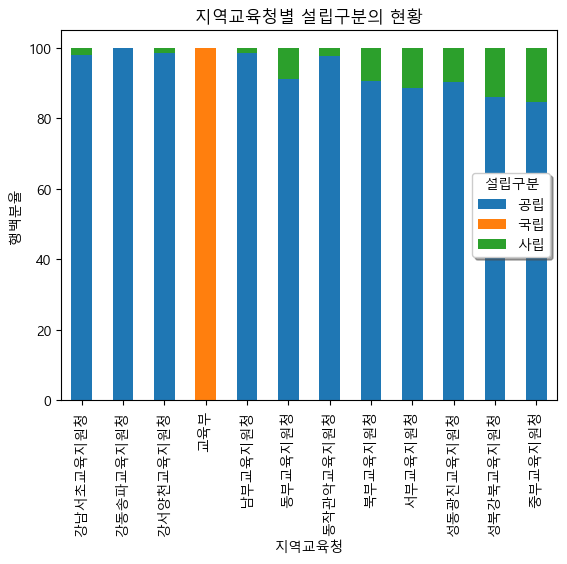

In [23]:
# 교차표 생성
cross_table = pd.crosstab(index     = sen['지역교육청'], 
                          columns   = sen['설립구분'], 
                          normalize = 'index') * 100

# 막대그래프 그리기
cross_table.plot(kind = 'bar', stacked = True)
plt.xlabel('지역교육청')
plt.ylabel('행백분율')
plt.title("지역교육청별 설립구분의 현황")
plt.legend(title          = '설립구분', 
           loc            = 'center right', 
           fancybox       = True, 
           shadow         = True)
plt.savefig('d:/SEN/cross_table_plot.png', bbox_inches = 'tight')
plt.show()

#### 6. 산점도(Scatter Plot)

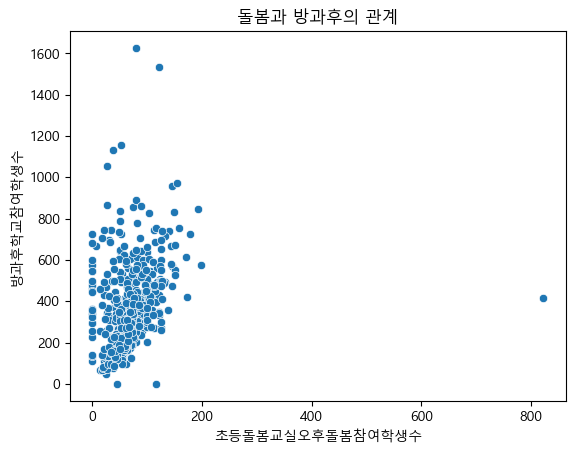

In [26]:
# 2개의 수치형 데이터 간의 관계를 파악
# 관계(Relation) : 상관관계 = 직선의 관계 = 선형의 관계

# 산점도 그리기
sns.scatterplot(x    = '초등돌봄교실오후돌봄참여학생수', 
                y    = '방과후학교참여학생수', 
                data = sen)
plt.xlabel('초등돌봄교실오후돌봄참여학생수')
plt.ylabel('방과후학교참여학생수')
plt.title('돌봄과 방과후의 관계')
plt.show()

In [27]:
# 수치형 데이터만 선택
numeric_sen = sen.select_dtypes(include = 'number')
numeric_sen

학교급코드  제외사유  교과프로그램수  교과수강학생수  특기적성프로그램수  특기적성수강학생수  프로그램수합계  수강학생수합계  \
0        2   NaN        3       27         44        418       47      445   
1        2   NaN       20      251         31        360       51      611   
2        2   NaN       10      165         33        476       43      641   
3        2   NaN        0        0          0          0        0        0   
4        2   NaN       14      184         47        680       61      864   
..     ...   ...      ...      ...        ...        ...      ...      ...   
599      2   NaN       26      183         15        360       41      543   
600      2   NaN       23      392         47        884       70     1276   
601      2   NaN       27      227         33        668       60      895   
602      2   NaN       15      199         42        557       57      756   
603      2   NaN       11      187         42        590       53      777   

     방과후학교참여학생수  초등돌봄교실오후돌봄운영교실수  ...  초등돌봄교실저녁돌봄참여학생수  초등돌봄교실방과후학교연계형돌봄운영교실수  \
0           320                1  ...                9                      0   
1           297                0  ...                0                      0   
2           339                2  ...                1                      0   
3             0                2  ...                0                      0   
4           401                4  ...                0                      1   
..          ...              ...  ...              ...                    ...   
599         276                4  ...                6                      1   
600         675                6  ...                5                      3   
601         413                2  ...                2                      0   
602         334                3  ...                4                      0   
603         382                4  ...                3                      0   

     초등돌봄교실방과후학교연계형돌봄참여학생수  초등돌봄참여학생중특수교육대상학생수  특수학교종일반학급수  특수학교종일반참여학생수  \
0                        0                   0           0             0   
1                        0                   0           0             0   
2                        0                   0           0             0   
3                        0                   0           0             0   
4                       38                   0           0             0   
..                     ...                 ...         ...           ...   
599                      3                   0           0             0   
600                     66                   0           0             0   
601                      0                   0           0             0   
602                      0                   0           0             0   
603                      0                   1           0             0   

     방과후학교수익자부담금액  방과후학교수익자부담외지원금액  초등돌봄교실수익자부담금액  초등돌봄교실수익자부담외지원금액  
0       256434000         13830000       14300000         101600000  
1       165002890           458640              0                 0  
2       222315270          8552780              0         336814450  
3               0                0              0                 0  
4       238279970         23456050              0         170907550  
..            ...              ...            ...               ...  
599     131697800         34238020        7205000         155564150  
600     236681233         36866310       51076300          75115000  
601     384202740         18358000        9738000          72961390  
602     163402670         11061040       15664000            209000  
603     229302230         36128440       28665000          10036000  

[604 rows x 22 columns]

In [28]:
# '학교급코드'와 '제외사유' 열 삭제
numeric_sen.drop(columns = ['학교급코드', '제외사유'], inplace = True)
numeric_sen

교과프로그램수  교과수강학생수  특기적성프로그램수  특기적성수강학생수  프로그램수합계  수강학생수합계  방과후학교참여학생수  \
0          3       27         44        418       47      445         320   
1         20      251         31        360       51      611         297   
2         10      165         33        476       43      641         339   
3          0        0          0          0        0        0           0   
4         14      184         47        680       61      864         401   
..       ...      ...        ...        ...      ...      ...         ...   
599       26      183         15        360       41      543         276   
600       23      392         47        884       70     1276         675   
601       27      227         33        668       60      895         413   
602       15      199         42        557       57      756         334   
603       11      187         42        590       53      777         382   

     초등돌봄교실오후돌봄운영교실수  초등돌봄교실오후돌봄참여학생수  초등돌봄교실저녁돌봄운영교실수  초등돌봄교실저녁돌봄참여학생수  \
0                  1               25                1                9   
1                  0                0                0                0   
2                  2               55                1                1   
3                  2               45                0                0   
4                  4               75                0                0   
..               ...              ...              ...              ...   
599                4               67                3                6   
600                6              150                1                5   
601                2               44                1                2   
602                3              110                1                4   
603                4               86                1                3   

     초등돌봄교실방과후학교연계형돌봄운영교실수  초등돌봄교실방과후학교연계형돌봄참여학생수  초등돌봄참여학생중특수교육대상학생수  \
0                        0                      0                   0   
1                        0                      0                   0   
2                        0                      0                   0   
3                        0                      0                   0   
4                        1                     38                   0   
..                     ...                    ...                 ...   
599                      1                      3                   0   
600                      3                     66                   0   
601                      0                      0                   0   
602                      0                      0                   0   
603                      0                      0                   1   

     특수학교종일반학급수  특수학교종일반참여학생수  방과후학교수익자부담금액  방과후학교수익자부담외지원금액  초등돌봄교실수익자부담금액  \
0             0             0     256434000         13830000       14300000   
1             0             0     165002890           458640              0   
2             0             0     222315270          8552780              0   
3             0             0             0                0              0   
4             0             0     238279970         23456050              0   
..          ...           ...           ...              ...            ...   
599           0             0     131697800         34238020        7205000   
600           0             0     236681233         36866310       51076300   
601           0             0     384202740         18358000        9738000   
602           0             0     163402670         11061040       15664000   
603           0             0     229302230         36128440       28665000   

     초등돌봄교실수익자부담외지원금액  
0           101600000  
1                   0  
2           336814450  
3                   0  
4           170907550  
..                ...  
599         155564150  
600          75115000  
601          72961390  
602            209000  
603          10036000  

[604 rows x 20 columns]

C:\Users\buillee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\buillee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\buillee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\buillee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

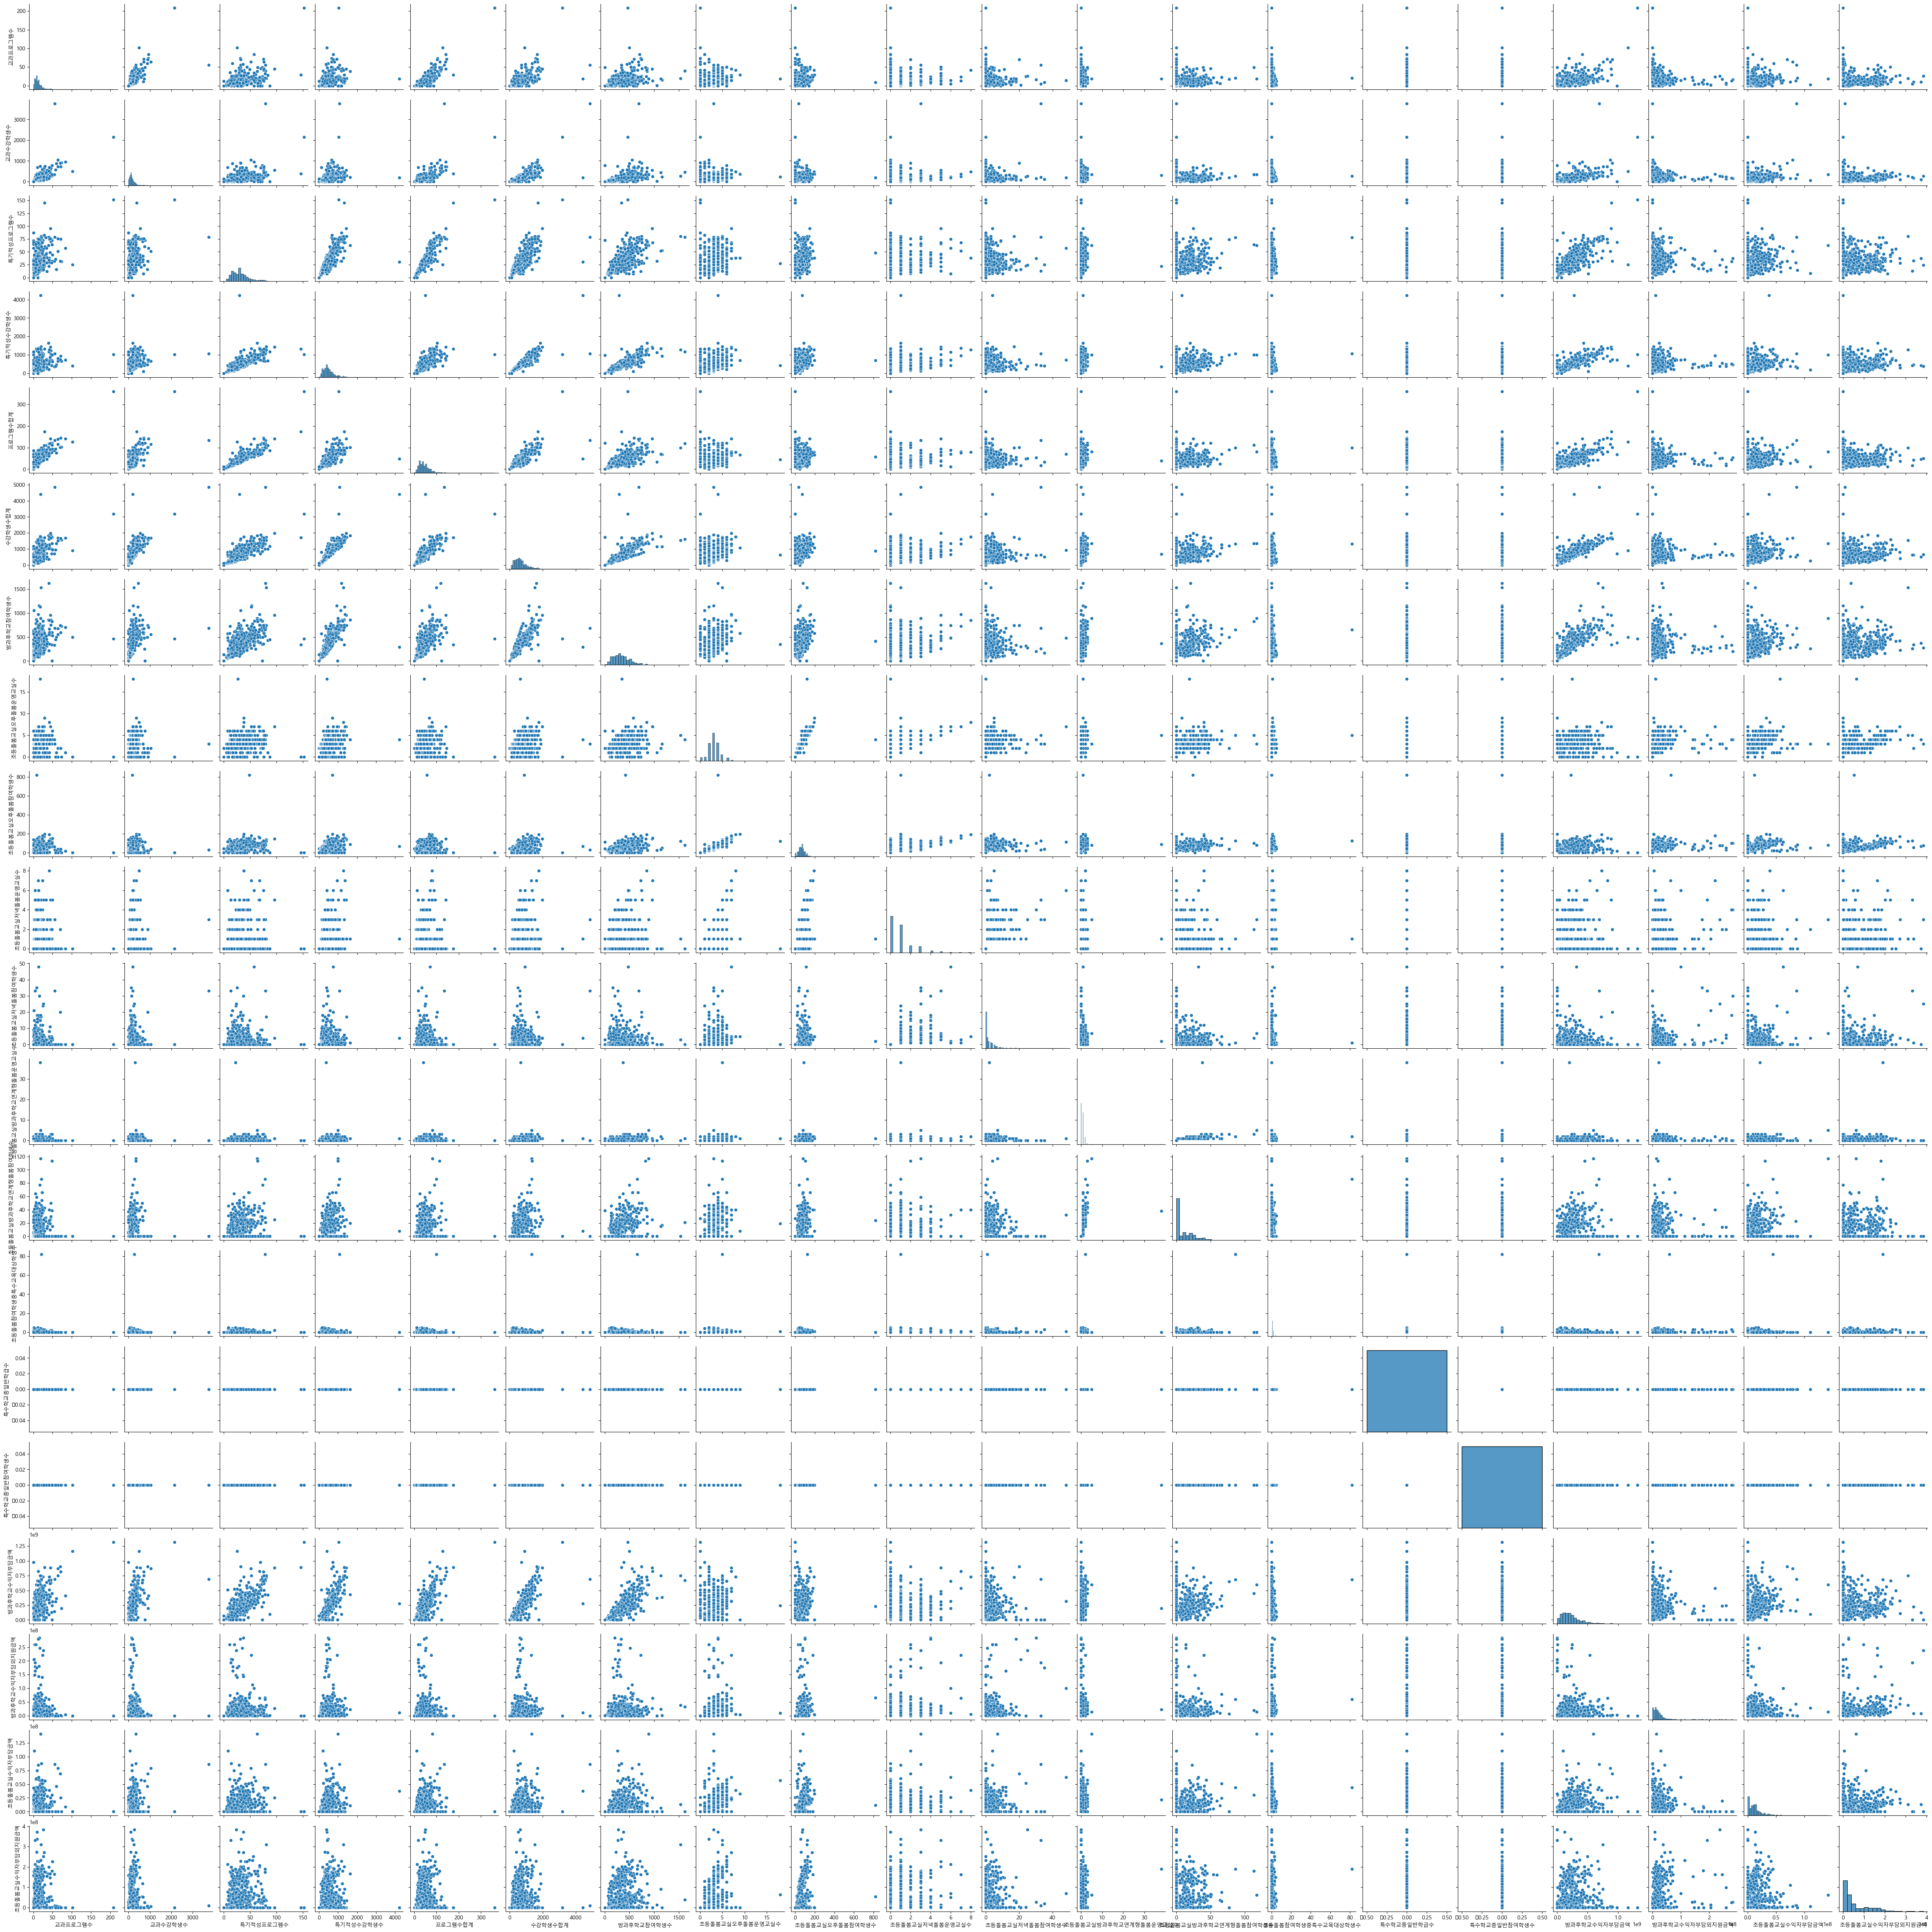

In [29]:
# 산점행렬도(SPM : Scatter Plot Matrix) 그리기
sns.pairplot(numeric_sen)
plt.show()

#### 7. 상관계수(Coefficient of Correlation)

In [50]:
# X : "초등돌봄교실오후돌봄참여학생수"
# Y : "방과후학교참여학생수"

In [51]:
# 두 변수 간의 상관계수 계산
correlation = sen['초등돌봄교실오후돌봄참여학생수'].corr(sen['방과후학교참여학생수'])
print("두 변수 간의 상관계수:", correlation)

두 변수 간의 상관계수: 0.29748676954988856


In [52]:
# 상관계수 해석의 일반적인 가아드 : 절대값 기준

# 상관계수 : -1 ~ +1

# 0.0 이상 ~ 0.2 미만 : 상관관계가 없다.
# 0.2 이상 ~ 0.4 미만 : 약한(낮은) 상관관계가 있다.
# 0.4 이상 ~ 0.6 미만 : 보통의 상관관계가 있다.
# 0.6 이상 ~ 0.8 미만 : 강한(높은) 상관관계가 있다.
# 0.8 이상 ~ 1.0 이하 : 매우 강한(높은) 상관관계가 있다.

In [54]:
# 상관계수 행렬 : Pearson
# 참고         : Spearman, Kendall
correlation_matrix = numeric_sen.corr(method = "pearson")

print("상관계수 행렬:")
round(correlation_matrix, ndigits = 3)

상관계수 행렬:


교과프로그램수  교과수강학생수  특기적성프로그램수  특기적성수강학생수  프로그램수합계  \
교과프로그램수                  1.000    0.724      0.484      0.316    0.828   
교과수강학생수                  0.724    1.000      0.410      0.345    0.637   
특기적성프로그램수                0.484    0.410      1.000      0.710    0.892   
특기적성수강학생수                0.316    0.345      0.710      1.000    0.619   
프로그램수합계                  0.828    0.637      0.892      0.619    1.000   
수강학생수합계                  0.591    0.752      0.708      0.878    0.759   
방과후학교참여학생수               0.381    0.427      0.619      0.724    0.594   
초등돌봄교실오후돌봄운영교실수         -0.010    0.031      0.147      0.268    0.089   
초등돌봄교실오후돌봄참여학생수         -0.001    0.035      0.181      0.274    0.116   
초등돌봄교실저녁돌봄운영교실수          0.016    0.049      0.093      0.157    0.068   
초등돌봄교실저녁돌봄참여학생수          0.041    0.181      0.026      0.063    0.038   
초등돌봄교실방과후학교연계형돌봄운영교실수    0.030    0.050      0.064      0.109    0.056   
초등돌봄교실방과후학교연계형돌봄참여학생수    0.064    0.087      0.240      0.305    0.187   
초등돌봄참여학생중특수교육대상학생수      -0.000   -0.010      0.077      0.043    0.049   
특수학교종일반학급수                 NaN      NaN        NaN        NaN      NaN   
특수학교종일반참여학생수               NaN      NaN        NaN        NaN      NaN   
방과후학교수익자부담금액             0.574    0.552      0.716      0.670    0.756   
방과후학교수익자부담외지원금액         -0.056   -0.044     -0.021      0.029   -0.042   
초등돌봄교실수익자부담금액            0.108    0.258      0.124      0.184    0.135   
초등돌봄교실수익자부담외지원금액        -0.002   -0.025      0.080      0.095    0.050   

                       수강학생수합계  방과후학교참여학생수  초등돌봄교실오후돌봄운영교실수  초등돌봄교실오후돌봄참여학생수  \
교과프로그램수                  0.591       0.381           -0.010           -0.001   
교과수강학생수                  0.752       0.427            0.031            0.035   
특기적성프로그램수                0.708       0.619            0.147            0.181   
특기적성수강학생수                0.878       0.724            0.268            0.274   
프로그램수합계                  0.759       0.594            0.089            0.116   
수강학생수합계                  1.000       0.726            0.204            0.210   
방과후학교참여학생수               0.726       1.000            0.296            0.297   
초등돌봄교실오후돌봄운영교실수          0.204       0.296            1.000            0.654   
초등돌봄교실오후돌봄참여학생수          0.210       0.297            0.654            1.000   
초등돌봄교실저녁돌봄운영교실수          0.135       0.133            0.360            0.300   
초등돌봄교실저녁돌봄참여학생수          0.137       0.027            0.193            0.145   
초등돌봄교실방과후학교연계형돌봄운영교실수    0.102       0.133            0.147            0.115   
초등돌봄교실방과후학교연계형돌봄참여학생수    0.258       0.321            0.233            0.240   
초등돌봄참여학생중특수교육대상학생수       0.025       0.027            0.077            0.064   
특수학교종일반학급수                 NaN         NaN              NaN              NaN   
특수학교종일반참여학생수               NaN         NaN              NaN              NaN   
방과후학교수익자부담금액             0.752       0.730            0.127            0.150   
방과후학교수익자부담외지원금액         -0.002       0.017            0.161            0.161   
초등돌봄교실수익자부담금액            0.261       0.218            0.331            0.239   
초등돌봄교실수익자부담외지원금액         0.054       0.143            0.289            0.230   

                       초등돌봄교실저녁돌봄운영교실수  초등돌봄교실저녁돌봄참여학생수  \
교과프로그램수                          0.016            0.041   
교과수강학생수                          0.049            0.181   
특기적성프로그램수                        0.093            0.026   
특기적성수강학생수                        0.157            0.063   
프로그램수합계                          0.068            0.038   
수강학생수합계                          0.135            0.137   
방과후학교참여학생수                       0.133            0.027   
초등돌봄교실오후돌봄운영교실수                  0.360            0.193   
초등돌봄교실오후돌봄참여학생수                  0.300            0.145   
초등돌봄교실저녁돌봄운영교실수                  1.000            0.531   
초등돌봄교실저녁돌봄참여학생수                  0.531            1.000   
초등돌봄교실방과후학교연계형돌봄운영교실수            0.044            0.013   
초등돌봄교실방과후학교연계형돌봄참여학생

In [55]:
# 상관계수 행렬을 엑셀 파일로 저장
output_file = 'd:/SEN/correlation_matrix.xlsx'
correlation_matrix.to_excel(output_file)

In [56]:
# 새로운 열 생성하기 : Y : 수치형 데이터
sen['금액_합계'] = sen.filter(like = '금액').sum(axis = 1)
sen

시도교육청      지역교육청   지역    정보공시학교코드              학교명  학교급코드 설립구분 제외여부  \
0    서울특별시교육청        교육부  서초구  S000003511    서울교육대학교부설초등학교      2   국립    N   
1    서울특별시교육청        교육부  종로구  S000003563  서울대학교사범대학부설초등학교      2   국립    N   
2    서울특별시교육청  강남서초교육지원청  강남구  S010000738         서울개일초등학교      2   공립    N   
3    서울특별시교육청  강남서초교육지원청  강남구  S010000739         서울개포초등학교      2   공립    N   
4    서울특별시교육청  강남서초교육지원청  강남구  S010000741         서울구룡초등학교      2   공립    N   
..        ...        ...  ...         ...              ...    ...  ...  ...   
599  서울특별시교육청    남부교육지원청  구로구  S010006431        서울하늘숲초등학교      2   공립    N   
600  서울특별시교육청    남부교육지원청  구로구  S010006432         서울항동초등학교      2   공립    N   
601  서울특별시교육청  강동송파교육지원청  송파구  S010006433        서울해누리초등학교      2   공립    N   
602  서울특별시교육청    동부교육지원청  중랑구  S010006476        서울양원숲초등학교      2   공립    N   
603  서울특별시교육청  강동송파교육지원청  강동구  S010006543         서울강빛초등학교      2   공립    N   

     제외사유  교과프로그램수  ...  초등돌봄교실방과후학교연계형돌봄운영교실수  초등돌봄교실방과후학교연계형돌봄참여학생수  \
0     NaN        3  ...                      0                      0   
1     NaN       20  ...                      0                      0   
2     NaN       10  ...                      0                      0   
3     NaN        0  ...                      0                      0   
4     NaN       14  ...                      1                     38   
..    ...      ...  ...                    ...                    ...   
599   NaN       26  ...                      1                      3   
600   NaN       23  ...                      3                     66   
601   NaN       27  ...                      0                      0   
602   NaN       15  ...                      0                      0   
603   NaN       11  ...                      0                      0   

     초등돌봄참여학생중특수교육대상학생수  특수학교종일반학급수  특수학교종일반참여학생수  방과후학교수익자부담금액  \
0                     0           0             0     256434000   
1                     0           0             0     165002890   
2                     0           0             0     222315270   
3                     0           0             0             0   
4                     0           0             0     238279970   
..                  ...         ...           ...           ...   
599                   0           0             0     131697800   
600                   0           0             0     236681233   
601                   0           0             0     384202740   
602                   0           0             0     163402670   
603                   1           0             0     229302230   

     방과후학교수익자부담외지원금액  초등돌봄교실수익자부담금액  초등돌봄교실수익자부담외지원금액      금액_합계  
0           13830000       14300000         101600000  386164000  
1             458640              0                 0  165461530  
2            8552780              0         336814450  567682500  
3                  0              0                 0          0  
4           23456050              0         170907550  432643570  
..               ...            ...               ...        ...  
599         34238020        7205000         155564150  328704970  
600         36866310       51076300          75115000  399738843  
601         18358000        9738000          72961390  485260130  
602         11061040       15664000            209000  190336710  
603         36128440       28665000          10036000  304131670  

[604 rows x 30 columns]

In [58]:
# "학생수"로 끝나는 열만 선택
student_count_columns = sen.filter(regex = '학생수$')
student_count_columns

교과수강학생수  특기적성수강학생수  방과후학교참여학생수  초등돌봄교실오후돌봄참여학생수  초등돌봄교실저녁돌봄참여학생수  \
0         27        418         320               25                9   
1        251        360         297                0                0   
2        165        476         339               55                1   
3          0          0           0               45                0   
4        184        680         401               75                0   
..       ...        ...         ...              ...              ...   
599      183        360         276               67                6   
600      392        884         675              150                5   
601      227        668         413               44                2   
602      199        557         334              110                4   
603      187        590         382               86                3   

     초등돌봄교실방과후학교연계형돌봄참여학생수  초등돌봄참여학생중특수교육대상학생수  특수학교종일반참여학생수  
0                        0                   0             0  
1                        0                   0             0  
2                        0                   0             0  
3                        0                   0             0  
4                       38                   0             0  
..                     ...                 ...           ...  
599                      3                   0             0  
600                     66                   0             0  
601                      0                   0             0  
602                      0                   0             0  
603                      0                   1             0  

[604 rows x 8 columns]

In [ ]:
# Y : 종속변수(통계), Label or Target(인공지능) : "금액_합계"
# X : 독립변수(통계), Feature(인공지능)         : "XXX학생수"

# X가 Y에게 어떤 영향을 주는가? 예측(Prediction)
# 회귀분석(Regression Analysis)

In [67]:
# 종속 변수(Y)와 독립 변수(X) 분리
X = student_count_columns
Y = sen['금액_합계']

# 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, Y)

# 테스트 데이터에 대한 예측
Y_pred = model.predict(X)

# 모델 평가
mse = mean_squared_error(Y, Y_pred)
r2  = r2_score(Y, Y_pred)

print("평균제곱오차(MSE):", mse)
print("결정계수(R^2):", r2)

평균제곱오차(MSE): 1.5985231378368484e+16
결정계수(R^2): 0.5967987793880993


In [69]:
# 회귀 모델 생성 및 학습
model  = sm.OLS(Y, X)
result = model.fit()

# 회귀 분석 결과 출력
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  금액_합계   R-squared (uncentered):                   3.501
Model:                            OLS   Adj. R-squared (uncentered):              3.530
Method:                 Least Squares   F-statistic:                             -119.4
Date:                Fri, 10 May 2024   Prob (F-statistic):                        1.00
Time:                        14:33:48   Log-Likelihood:                         -12130.
No. Observations:                 604   AIC:                                  2.427e+04
Df Residuals:                     597   BIC:                                  2.430e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

C:\Users\buillee\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
